In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [14]:
#Import Data and Extract Features and Dependend Variable

train = pd.read_csv('./data/train_clean_std_reduced.csv')
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 


In [15]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(features, price)
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [16]:
svr.set_params(C = 10, gamma = 0.001)
svr.fit(features, price)




SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
test = pd.read_csv('./data/test_clean_std_reduced.csv')
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = svr.predict(test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,-0.718852
1,1462,-0.053753
2,1463,0.282860
3,1464,0.437074
4,1465,0.270591


In [18]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(np.log(train_pre_stand[['SalePrice']]))


# inverse transform on transformed price
submission['SalePrice'] = (np.exp(scaler.inverse_transform(submission['SalePrice']))).round(1)
submission.to_csv("./data/svm2_submission.csv",index = False)

In [19]:
submission['SalePrice'].head()

0    125116.7
1    163176.3
2    186652.0
3    198507.3
4    185739.8
Name: SalePrice, dtype: float64

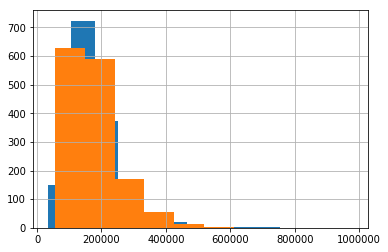

In [20]:
train_pre_stand['SalePrice'].hist()
submission['SalePrice'].hist()